# Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from scipy import stats
import math

In [2]:
sns.set(color_codes=True)

In [10]:
json_list = []
with open('resources/output.json') as f:
    for n, line in enumerate(f):
        if (n > 10):
            break
        try:
            json_list.append(json.loads(line))
        except:
            print(n)

buildings = pd.DataFrame(json_list)
buildings = buildings.drop(columns=['_id', 'building_centroid', 'geometry', 'request_area_bottom_left', 'request_area_top_right'])
buildings.iloc[1]

addr:housenumber                                                  NaN
addr:street                                                       NaN
air_quality                                                0.00270612
amenity                                                           NaN
building                                                         None
closes_shop                                                0.00025333
description                                                       NaN
height                                                             15
name                                                              NaN
roof:shape                                                        NaN
shops_count                                                        15
weather             {'temperature': 19.37, 'cloud_cover': 0.4, 'hu...
Name: 1, dtype: object

In [11]:
buildings = buildings.drop(columns=['addr:housenumber', 'addr:street', 'description', 'roof:shape', 'name'])
buildings.iloc[1]

air_quality                                           0.00270612
amenity                                                      NaN
building                                                    None
closes_shop                                           0.00025333
height                                                        15
shops_count                                                   15
weather        {'temperature': 19.37, 'cloud_cover': 0.4, 'hu...
Name: 1, dtype: object

In [3]:
salaries = ceo_data_frame.iloc[:, 0].copy()
sorted_salaries = salaries.copy().sort_values().reset_index(drop=True)

# 1

## 1.a

In [4]:
#1.a mean
salaries.mean()

2027.5167785234898

2027 is the mean (average) salary of the given data. That means that average salary of the CEO is 2027

In [5]:
#1.a 10%-trimmed mean
#stats.trim_mean(salaries, .1)
trim = 0.1
salaries_count = salaries.count()
lower_boundary = int(salaries_count * trim) + 1
upper_boundary = salaries_count - int(salaries_count * trim)
trimmed_salaries = sorted_salaries[lower_boundary - 1:upper_boundary].reset_index(drop=True)
trimmed_salaries.mean()

1710.091922005571

1710 is the mean salary of trimmed data. It differs from mean on whole dataset, that means that given dataset has outliers. So it's more likely that majority of CEOs have salary closer to the trimmed mean.

In [6]:
def discrete_quantile(arr, q):
    arr = np.sort(np.array(arr))
    size = arr.size
    part = size * q
    if (part < 1):
        return arr[0]
    elif (part >= size) :
        return arr[arr.size - 1]
    int_part = int(part)
    if (int_part == part):
        return (arr[int_part - 1] + arr[int_part]) / 2
    else:
        return arr[int_part]
    
#1.a median
#salaries.median()
discrete_quantile(salaries, 0.5)

1600

1600 is the median of the given data. It means that 50% of CEOs have lower salary and other 50% higher

In [7]:
#1.a lower quartile
#salaries.quantile(q=0.25)
discrete_quantile(salaries, 0.25)

1083

1083 is the lower quartile. It means that 25% of CEOs have lower salary and other 75% higher

In [8]:
#1.a upper quartile
#salaries.quantile(q=0.75)
discrete_quantile(salaries, 0.75)

2350

2350 is the upper quartile. It means that 75% of CEOs have lower salary and other 25% higher

In [9]:
#1.a 0.1-quantile
#salaries.quantile(q=0.1)
discrete_quantile(salaries, 0.1)

750

750 is the 0.1-quantile. It means that 10% of CEOs have lower salary and other 90% higher. It shows the approximate salary of the poorest CEOs

In [10]:
#1.a 0.9-quantile
#salaries.quantile(q=0.9)
discrete_quantile(salaries, 0.9)

3400

3400 is the 0.9-quantile. It means that 90% of CEOs have lower salary and other 10% higher. It shows the approximate salary of the richest CEOs

## 1.b

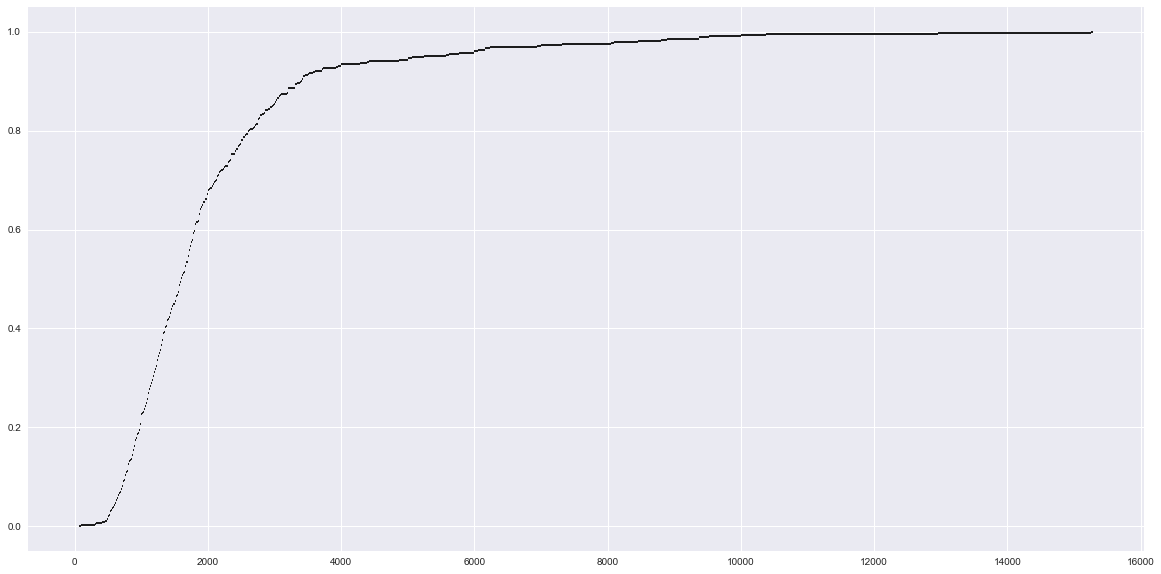

In [11]:
#1.b ECDF
def plot_discrete_ecdf(arr, colors = 'k'):
    arr = np.sort(np.array(arr))
    size = arr.size
    xs, counts = np.unique(arr, return_counts=True)
    ys = [0]
    steps = []
    for i in range(xs.size):
        ys.append(ys[i] + counts[i] / size)
        if (i > 0):
            steps.append(xs[i] - xs[i-1])
    mean_step = np.array(steps).mean()
    x_mins = np.concatenate((np.array([xs[0] - mean_step]), xs))
    x_maxs = np.concatenate((xs, np.array([xs[xs.size-1] + mean_step])))
    plt.hlines(ys, x_mins, x_maxs, colors = colors)

plt.figure(figsize=(20,10))
plot_discrete_ecdf(salaries, colors='black')
plt.show()

In [12]:
#1.b 0.2-quantile
#salaries.quantile(q=0.2)
discrete_quantile(salaries, 0.2)

975

F<sup>-1</sup>(0.2) is the 0.2-quantile. It means that 20% of CEOs have lower salary and other 80% higher

In [13]:
#1.b 0.8-quantile
#salaries.quantile(q=0.8)
discrete_quantile(salaries, 0.8)

2615

F<sup>-1</sup>(0.8) is the 0.8-quantile. It means that 80% of CEOs have lower salary and other 20% higher

In [14]:
def discrete_ecdf(arr, x):
    arr = np.array(arr)
    if (x < arr.min()):
        return 0
    elif (x >= arr.max()):
        return 1
    
    arr = np.sort(arr)
    xs, counts = np.unique(arr, return_counts=True)
    size = arr.size
    result = 0
    index = 0
    current_x = xs[index]
    while (x >= current_x):
        result += counts[index] / size
        index += 1
        current_x = xs[index]
    return result

#1.b F(1000)
discrete_ecdf(salaries, 1000)

0.22371364653243878

F(1000) = 0.22. It means that the 22% of CEOs have lower salary than 1000

In [15]:
#1.b 1 - F(5000)
1 - discrete_ecdf(salaries, 5000)

0.05369127516778227

1 - F(5000) = 0.05. It means that the 5% of CEOs have higher salary thatn 5000

## 1.c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


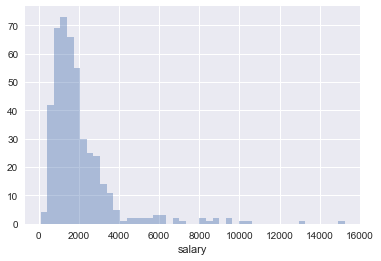

In [16]:
#1.c histogram
sns.distplot(salaries, bins=None, hist=True, kde=False)

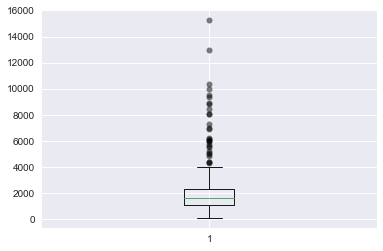

In [17]:
#1.c Box-plot
def plot_boxplot(arr):
    bp = plt.boxplot(arr)
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
plot_boxplot(salaries)

Based on the histogram and the Box-plot I can conclude that the distribution of the data is not symmetric. It is right-skewed and has outliers.

In [18]:
#1.c skewness
#stats.skew(salaries)
def skewness(arr):
    arr = np.array(arr)
    return (((arr - arr.mean()) / arr.std()) ** 3).sum() / arr.size
skewness(salaries)

3.3910048111568534

Skewness is measure of symmetry. For given data skewness = 3.39. It means that the distribution of the data is not symmetric, it is right-skewed.

## 1.d

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


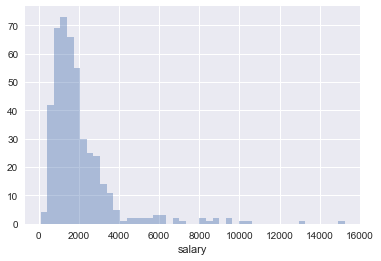

In [19]:
#1.d
sns.distplot(salaries, bins=None, hist=True, kde=False)

Seaborn's distplot uses Freedman-Diaconis rule to calculate number of bins for the histogram. Freedman-Diaconis rule calculates bin size using the interquartile range of the data and total number of observations (bin size = 2 * (QA / n ** (1/3))).

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


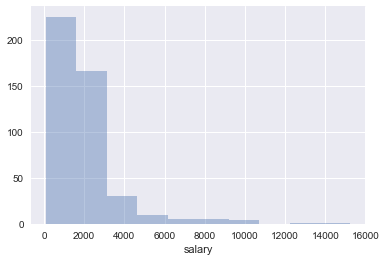

In [20]:
#1.d
sns.distplot(salaries, bins=10, hist=True, kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


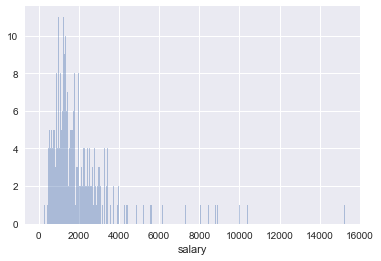

In [21]:
#1.d
sns.distplot(salaries, bins=500, hist=True, kde=False)

It is hard to describe the data distribution with histograms using too small or too big values for bin size

## 1.e

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


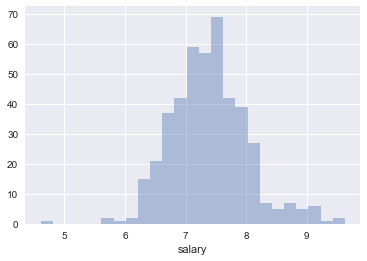

In [22]:
#1.e
log_salaries = np.log(salaries)
#histogram
sns.distplot(log_salaries, bins=None, hist=True, kde=False)

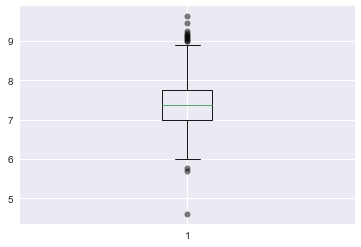

In [23]:
#1.e boxplot
plot_boxplot(log_salaries)

In [24]:
log_salaries.mean()

7.3918983157517735

In [25]:
discrete_quantile(log_salaries, 0.5)

7.3777589082278725

Using ln function on right-skewed data gives more-likely symmetric data with close to binomial distribution. Mean and median are almost equal. It means that our data is almost symmetrical

# 2

In [26]:
tot_comp = ceo_data_frame['totcomp'].copy()
tenure = ceo_data_frame['tenure'].copy()
age	 = ceo_data_frame['age'].copy()
sales = ceo_data_frame['sales'].copy()
profits = ceo_data_frame['profits'].copy()
assets = ceo_data_frame['assets'].copy()

## 2.a

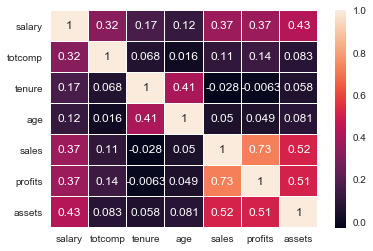

In [27]:
#Pearson
corr_matrix = ceo_data_frame.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, linewidths=.1)

Correlation coefficient of Pearson shows linear relationship. Based on the heatmap salary has the highest linear relationship with assets and the lowest with age.

## 2.b

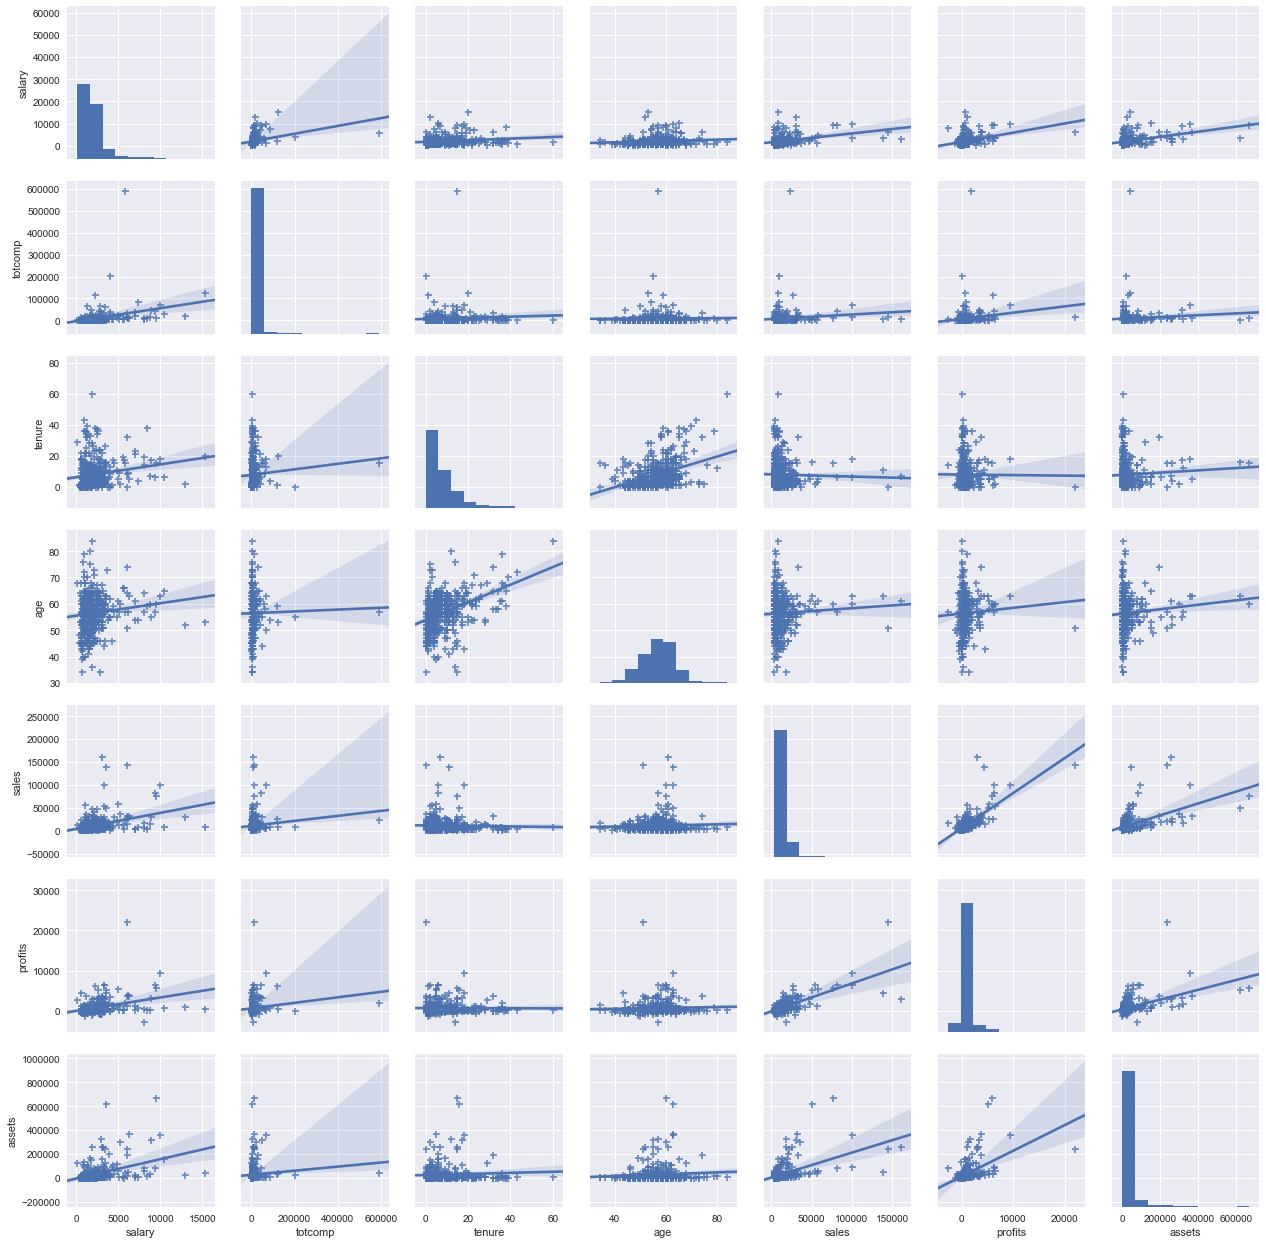

In [28]:
#result = pd.plotting.scatter_matrix(ceo_data_frame, figsize = (12,12), alpha = 0.5)
sns.pairplot(ceo_data_frame, markers='+', kind='reg')

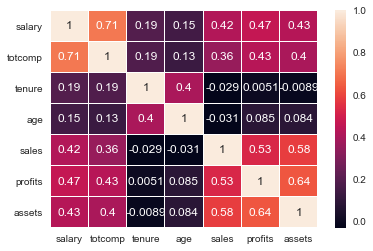

In [29]:
#Spearman
corr_matrix = ceo_data_frame.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, linewidths=.1)

Correlation coefficient of Spearman shows monothonic relationship. Results for salary changed a little bit: relationship with totcomp increased significantly and with sales and profits increased a little bit. Relationship with other attributes remain almost the same.

In [30]:
#rank salary = 6000
def get_rank(arr, x):
    arr = pd.Series(arr)
    arr_df = pd.DataFrame(data = {'rank': arr.rank(), 'value': arr})
    result = arr_df[arr_df['value'] == x]
    if (result.size == 0):
        return -1
    else:
        return result['rank'].iloc[0]
    
get_rank(salaries, 6000)

429.5

## 2.c

In [31]:
young_salaries = ceo_data_frame[ceo_data_frame['age'] < 50]['salary']
old_salaries = ceo_data_frame[ceo_data_frame['age'] >= 50]['salary']

In [32]:
young_salaries.describe()

count      62.000000
mean     1406.548387
std       805.548173
min       297.000000
25%       750.000000
50%      1321.000000
75%      1800.000000
max      4280.000000
Name: salary, dtype: float64

In [33]:
skewness(young_salaries)

1.153542688611891

In [34]:
old_salaries.describe()

count      385.000000
mean      2127.516883
std       1808.577723
min        100.000000
25%       1117.000000
50%       1660.000000
75%       2460.000000
max      15250.000000
Name: salary, dtype: float64

In [35]:
skewness(old_salaries)

3.260211799347486

In [36]:
old_salaries.describe() - young_salaries.describe()

count      323.000000
mean       720.968496
std       1003.029551
min       -197.000000
25%        367.000000
50%        339.000000
75%        660.000000
max      10970.000000
Name: salary, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


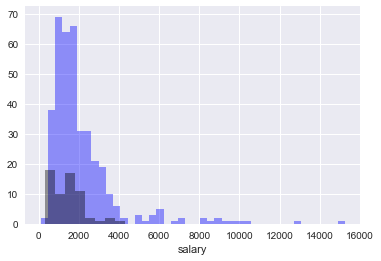

In [37]:
sns.distplot(old_salaries, bins=None, hist=True, kde=False, color='blue')
sns.distplot(young_salaries, bins=None, hist=True, kde=False, color='black')
plt.show()

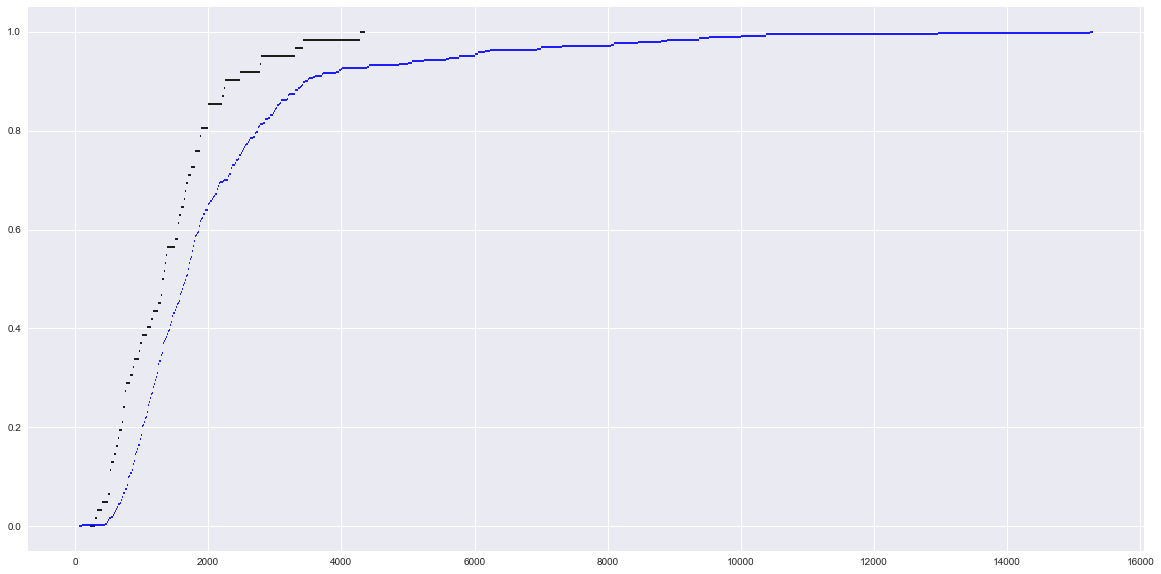

In [38]:
plt.figure(figsize=(20,10))
plot_discrete_ecdf(young_salaries, colors = 'black')
plot_discrete_ecdf(old_salaries, colors = 'blue')
plt.show()

Younger CEOs (age < 50) have little bit lower salaries on all quantiles (except the few observations with min value for older CEOs). Also, younger CEO salaries distribution is more symmetric and almost doesn't have outliers. It means that younger CEOs don't have really high salaries comparing to older CEOs.

# 3

## 3.a

In [39]:
age_categories = ceo_data_frame['age'].map(lambda x: '<50' if x < 50 else '>=50')
salary_categories = ceo_data_frame['salary'].map(lambda x: '<2000' if x < 2000 else ('>=2000 and <4000' if x < 4000 else '>=4000'))
absolute = pd.crosstab(salary_categories, age_categories, margins=True)
absolute

age,<50,>=50,All
salary,,,
<2000,52,248,300
>=2000 and <4000,9,107,116
>=4000,1,30,31
All,62,385,447


In [40]:
relative = absolute/absolute.loc['All', 'All']
relative

age,<50,>=50,All
salary,,,
<2000,0.116331,0.554810,0.671141
>=2000 and <4000,0.020134,0.239374,0.259508
>=4000,0.002237,0.067114,0.069351
All,0.138702,0.861298,1.000000


## 3.b

In [41]:
absolute.iloc[0,1]

248

n<sub>12</sub> = 248 is the quantity of CEOs with salary lower than 2000 and age higher than or equal to 50

In [42]:
relative.iloc[0,1]

0.5548098434004475

h<sub>12</sub> = 0.55. It means that the 55% of all CEOs have salary lower than 2000 and age higher than or equal to 50

In [43]:
absolute.iloc[0,2]

300

n<sub>1</sub>. = 300 is the total quantity of CEOs with salary lower than 2000

In [44]:
relative.iloc[0,2]

0.6711409395973155

h<sub>1</sub>. = 0.67. It means that the 67% of all CEOs have salary lower than 2000

## 3.c

In [45]:
#chi2, p, dof, ex = stats.chi2_contingency(absolute, correction=False)
#chi2
def get_chi2(df):
    row_count, col_count = np.array(df.shape) - 1
    total = df.iloc[row_count,col_count]
    local = df.iloc[0:row_count, 0:col_count].copy()
    for i in range(row_count):
        for j in range(col_count):
            temp = df.iloc[i,col_count] * df.iloc[row_count,j] / total
            local.iloc[i,j] = (df.iloc[i,j] - temp) ** 2 / temp
    return local.sum().sum()
    
chi2 = get_chi2(absolute)
chi2

9.578733696566449

In [46]:
def pearson_contingency(df):
    row_count, col_count = np.array(df.shape) - 1
    total = df.iloc[row_count,col_count]
    chi2 = get_chi2(df)
    C = (chi2 ** 2 / (chi2 ** 2 + total)) ** (.5)
    min_count = min(row_count, col_count)
    Cmax = ((min_count - 1) / min_count) ** (.5)
    return C / Cmax

pearson_contingency(absolute)

0.583617886332254

Based on corrected contingency coefficient of Pearson there is medium dependency between salary and age if we break age data in two categories (<50 and >=50) and salary data in three categories (<2000, >=2000 <4000, >=4000)